# Lecture 5, The Pendulum 

**Overview:**
* Pendulum class
* Phase space plots
* Energy conservation and ODE integrators

---

In [1]:
# Keep import statement in their own cell at the top
import matplotlib.pyplot as plt # for plotting          
import numpy as np

# import our Pendulum class from Particle1D
from Particle1D import Pendulum

Below we will explore the behavior of a driven non-linear pendulum using our ODE class. The Pendulum class is a sub-class of `Particle` that we worked with in Lecture3. There are some modifications to fix the range of the pendulum displacement $\theta: [-\pi, \pi]$. 

When creating a new instance of Pendulum, we can provide many arguments that describe a driven damped oscillator:

        P = Pendulum(l = 9.8, m = 1.0, x0 = 0.0 ,v0 = 0.0, tf = 50.0, dt = 0.001)
        
        l: length of pendulum
        m: mass of pendulum
        x0: initial displacement
        v0: initial velocity
        tf: final time for our calculation
        dt: time step size

## The  pendulum class

* Create a new instance of pendulum and explore the attributes using tab completion
* Make sure you understand how the code below is working.
* Try modifying the class to include a custom RK4 integrator. *Note that, if you modify the class, you must* `restart` *kernal and re-run import statements for changes to take effect*.


In [2]:
p1 = Pendulum()
p2 = Pendulum(x0 = 0.5, l = 22)

In [3]:
print('Particle 1:')
p1.results()
p1.Euler_step()
print('\n')

print('Particle 2:')
p2.results()
p2.Verlet_step()


Particle 1:
Initial: t = 0.0, x = 0.0, v = 0.0, dt = 0.001
Current: t = 0.0, x = 0.0, v = 0.0


Particle 2:
Initial: t = 0.0, x = 0.5, v = 0.0, dt = 0.001
Current: t = 0.0, x = 0.5, v = 0.0


## Plotting trajectories

* What do you notice about the shape of the trajectory as the driving force is increased?
* Do you notice anything different about the trajectories from the different integrators?
* Try extending out to very long final times, what happens to the trajectory for each integrator?
* Not make `tf ~ 100`, and play around with different size timesteps `dt`. What happens to the trajectories for each integrator when the timestep is very large? Very small?

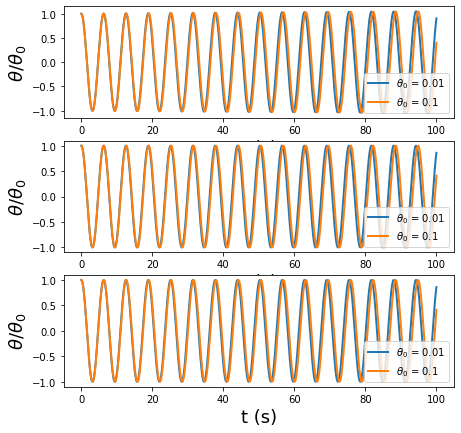

In [4]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
# Loop over different initial displacements and plot angle vs time for driven pendulum
    
# maximum initial displacement is 1, corresponds to pi radians.
x0s= [0.01, 0.1]

for x0 in x0s:
    p = Pendulum(x0 = np.pi*x0, tf= 100, dt = 1e-3)
    p.Euler_trajectory() 
    p.verlet_trajectory() 
    p.scipy_trajectory() #Use scipy ODEint 
    
    ax1.plot(p.tarray, p.x_euler/x0/np.pi, lw = 2, label = "$\\theta_0$ = {}".format(x0))
    ax2.plot(p.tarray, p.x_verlet/x0/np.pi, lw = 2, label = "$\\theta_0$ = {}".format(x0))
    ax3.plot(p.tarray, p.xv[:,0]/x0/np.pi, lw = 2, label = "$\\theta_0$ = {}".format(x0))

for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('t (s)',fontsize = 18)
    ax.set_ylabel('$\\theta / \\theta_0$', fontsize = 18)
    ax.legend(loc = 4)
plt.show()


## Phase space plots

* Explore the phase space plots for different values of starting amplitude, `dt`, and `tf`. 
* How do the phase space plots compare for the different ODE integrations schemes?

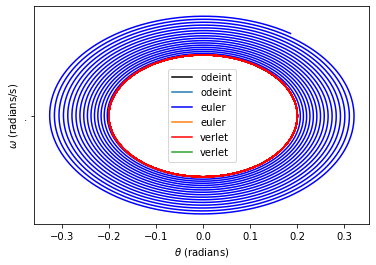

In [5]:
theta0 = 0.2
tf = 100
dt = 0.01

#fig = plt.figure()
#ax = fig.add_subplot(111)

# Initialize objects and calculate trajectories
p1 = Pendulum(x0 = theta0, tf = tf, dt = dt)
p1.Euler_trajectory()
p1.verlet_trajectory()
p1.scipy_trajectory()
p1.plot(pt = 'phase')    #I cannot figure out why phase space plots show up twice???

### Energy conservation
* Modify the pendulum class to include a method that calculates the total energy of the pendulum as a function of time.
* Calculate and plot the total pendulum energy using each of the ODE integrators: Euler, scipy, verlet, rk4, etc..